<a href="https://colab.research.google.com/github/JuanGans/PCVK_2024/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-34-fb301a9c92d2>:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(img, cmap="gray"), plt.title('Citra Awal')


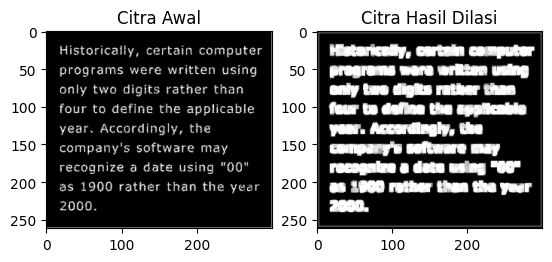

In [ ]:


#Read the image for dilation
img_path = "/content/drive/MyDrive/PCVK/morphology.png"
img = cv2.imread(img_path, 0)

# Check if the image was loaded successfully
if img is None:
    print(f"Error: Could not load image at {img_path}. Please check the path and file permissions.")
else:
    # Acquire size of the image
    p, q = img.shape
    # Show the image
    plt.imshow(img, cmap="gray")
    # Define new image to store the pixels of dilated image
    imgDilate = np.zeros((p, q), dtype=np.uint8)
    # Define the structuring element
    SED = np.array([[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]])
    constant1 = 2
    # Dilation operation without using inbuilt CV2 function
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = img[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgDilate[i, j] = np.max(product)
    plt.subplot(121), plt.imshow(img, cmap="gray"), plt.title('Citra Awal')
    plt.subplot(122), plt.imshow(imgDilate, cmap="gray"), plt.title('Citra Hasil Dilasi')

<ipython-input-35-f9b84667d5dd>:34: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(img, cmap="gray"), plt.title('Citra Awal')


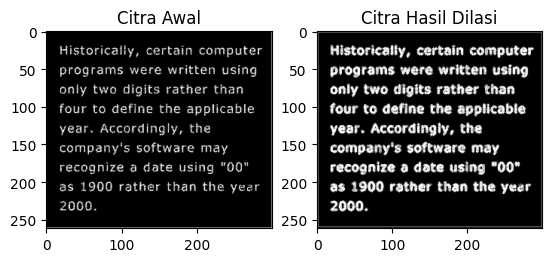

In [ ]:


# Read the image for dilation
img_path = "/content/drive/MyDrive/PCVK/morphology.png"
img = cv2.imread(img_path, 0)

# Check if the image was loaded successfully
if img is None:
    print(f"Error: Could not load image at {img_path}. Please check the path and file permissions.")
else:
    # Acquire size of the image
    p, q = img.shape
    # Show the original image
    plt.imshow(img, cmap="gray")

    # Define new image to store the pixels of dilated image
    imgDilate = np.zeros((p, q), dtype=np.uint8)

    # Define the cross-shaped structuring element (3x3)
    SED = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]])

    constant1 = 1  # Padding constant based on the SED size (3x3 -> constant = 1)

    # Dilation operation without using inbuilt CV2 function
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            # Extract the neighborhood of the current pixel
            temp = img[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            # Perform element-wise multiplication and find the maximum value (dilation)
            product = temp * SED
            imgDilate[i, j] = np.max(product)

    # Display the original and dilated images side by side
    plt.subplot(121), plt.imshow(img, cmap="gray"), plt.title('Citra Awal')
    plt.subplot(122), plt.imshow(imgDilate, cmap="gray"), plt.title('Citra Hasil Dilasi')
    plt.show()


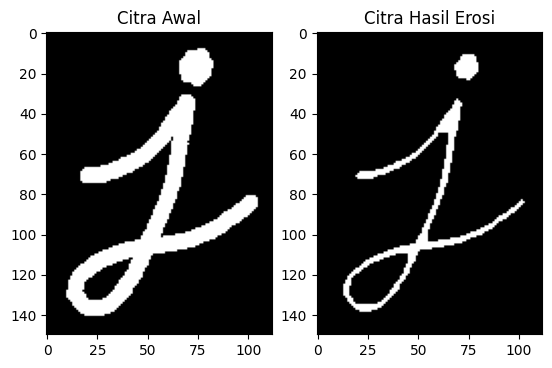

In [ ]:

# Read the image in grayscale
img_path = "/content/drive/MyDrive/PCVK/j.png"
img = cv.imread(img_path, 0)

# Define a 5x5 kernel for erosion
kernel = np.ones((5, 5), np.uint8)

# Get the dimensions of the image and the kernel
image_h, image_w = img.shape
kernel_h, kernel_w = kernel.shape

# Padding dimensions (half the size of the kernel)
pad_h = kernel_h // 2
pad_w = kernel_w // 2

# Pad the image with zeros to handle border pixels during erosion
padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

# Initialize the output image
erosion = np.zeros_like(img)

# Perform the erosion operation manually
for i in range(pad_h, image_h + pad_h):
    for j in range(pad_w, image_w + pad_w):
        # Extract the region of interest
        region = padded_img[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]

        # Apply the erosion (minimum value in the region)
        erosion[i - pad_h, j - pad_w] = np.min(region[kernel == 1])

# Display the original image and the eroded image
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion, cmap='gray'), plt.title('Citra Hasil Erosi')

# Show the plots
plt.show()


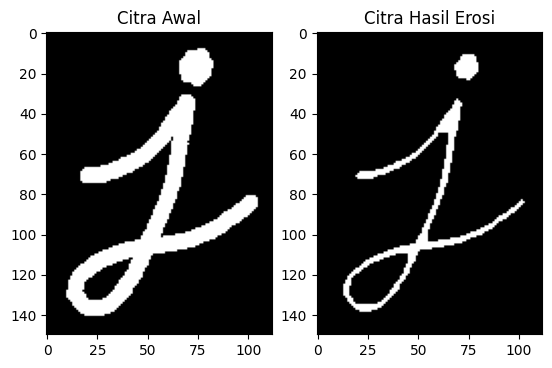

In [ ]:


# Read the image for erosion
img_path = "/content/drive/MyDrive/PCVK/j.png"
img = cv.imread(img_path, 0)

# Define a 5x5 kernel for erosion
kernel = np.ones((5, 5), np.uint8)

# Perform the erosion operation using OpenCV
erosion = cv.morphologyEx(img, cv.MORPH_ERODE, kernel)

# Display the original image and the eroded image in grayscale
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion, cmap='gray'), plt.title('Citra Hasil Erosi')

# Show the plots
plt.show()


(<Axes: title={'center': 'Citra Hasil Opening'}>,
 Text(0.5, 1.0, 'Citra Hasil Opening'))

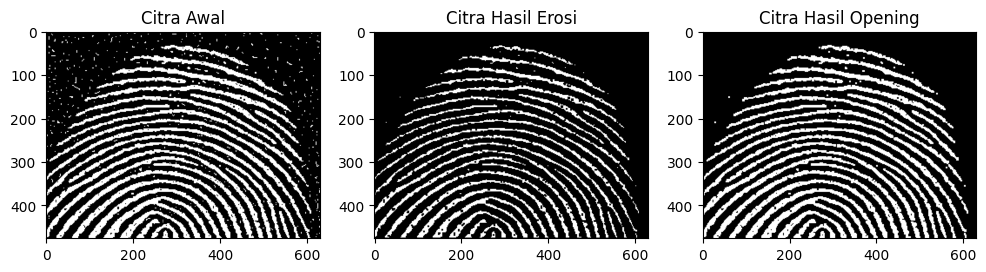

In [ ]:

img_path = "/content/drive/MyDrive/PCVK/fingerprint.png"
img = cv.imread(img_path, 0)


kernel = np.ones((3, 3), np.uint8)

# Get the dimensions of the image and the kernel
image_h, image_w = img.shape
kernel_h, kernel_w = kernel.shape

# Padding dimensions (half the size of the kernel)
pad_h = kernel_h // 2
pad_w = kernel_w // 2

# Pad the image with zeros to handle border pixels during erosion/opening
padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

# Initialize the output images for erosion and opening
erosion = np.zeros_like(img)
opening = np.zeros_like(img)

# Perform erosion manually
for i in range(pad_h, image_h + pad_h):
    for j in range(pad_w, image_w + pad_w):
        # Extract the region of interest
        region = padded_img[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]

        # Apply the erosion (minimum value in the region)
        erosion[i - pad_h, j - pad_w] = np.min(region[kernel == 1])

# Perform dilation on the eroded image for the opening operation (manual)
padded_erosion = np.pad(erosion, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
for i in range(pad_h, image_h + pad_h):
    for j in range(pad_w, image_w + pad_w):
        # Extract the region of interest from the eroded image
        region = padded_erosion[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]

        # Apply the dilation (maximum value in the region)
        opening[i - pad_h, j - pad_w] = np.max(region[kernel == 1])

# Display the original image, the eroded image, and the opened image
plt.figure(figsize=(12, 4))


plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.subplot(133), plt.imshow(opening, cmap='gray'), plt.title('Citra Hasil Opening')



(<Axes: title={'center': 'Citra Hasil Opening'}>,
 Text(0.5, 1.0, 'Citra Hasil Opening'))

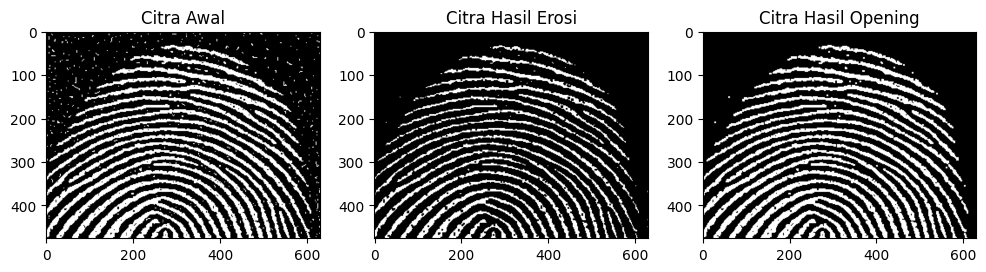

In [ ]:
# Read the image in grayscale
img_path = "/content/drive/MyDrive/PCVK/fingerprint.png"
img = cv.imread(img_path, 0)

# Define a 5x5 kernel
kernel = np.ones((3, 3), np.uint8)

# Perform the erosion and opening operations using OpenCV
erosion = cv.morphologyEx(img, cv.MORPH_ERODE, kernel)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

# Display the original image, the eroded image, and the opened image
plt.figure(figsize=(12, 4))


plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.subplot(133), plt.imshow(opening, cmap='gray'), plt.title('Citra Hasil Opening')

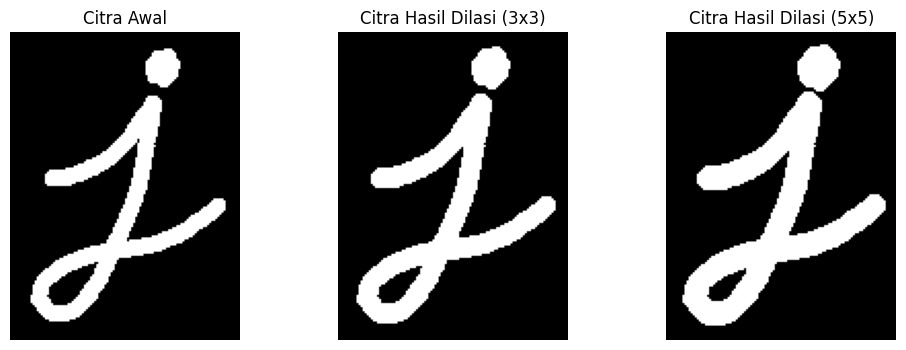

In [ ]:
import cv2 as cv

# Read the image in grayscale
img_path = "/content/drive/MyDrive/PCVK/j.png"
img = cv.imread(img_path, 0)

kernel_cross_3x3 = np.array([[0, 1, 0],
                              [1, 1, 1],
                              [0, 1, 0]], dtype=np.uint8)

kernel_cross_5x5 = np.array([[0, 0, 1, 0, 0],
                              [0, 0, 1, 0, 0],
                              [1, 1, 1, 1, 1],
                              [0, 0, 1, 0, 0],
                              [0, 0, 1, 0, 0]], dtype=np.uint8)

# Function to perform dilation manually
def manual_dilation(img, kernel):
    # Get the dimensions of the image and the kernel
    image_h, image_w = img.shape
    kernel_h, kernel_w = kernel.shape

    # Padding dimensions (half the size of the kernel)
    pad_h = kernel_h // 2
    pad_w = kernel_w // 2

    # Pad the image with zeros to handle border pixels during dilation
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Initialize the output image
    dilation = np.zeros_like(img)

    # Perform dilation manually
    for i in range(pad_h, image_h + pad_h):
        for j in range(pad_w, image_w + pad_w):
            # Extract the region of interest
            region = padded_img[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]

            # Apply dilation (maximum value in the region where kernel is 1)
            dilation[i - pad_h, j - pad_w] = np.max(region[kernel == 1])

    return dilation

# Perform dilation with the cross-shaped kernels
dilation_3x3 = manual_dilation(img, kernel_cross_3x3)
dilation_5x5 = manual_dilation(img, kernel_cross_5x5)

# Display the original image, the dilated image (3x3), and the dilated image (5x5)
plt.figure(figsize=(12, 4))

# Display the original image
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.axis('off')

# Display the dilated image with 3x3 kernel
plt.subplot(132), plt.imshow(dilation_3x3, cmap='gray'), plt.title('Citra Hasil Dilasi (3x3)')
plt.axis('off')

# Display the dilated image with 5x5 kernel
plt.subplot(133), plt.imshow(dilation_5x5, cmap='gray'), plt.title('Citra Hasil Dilasi (5x5)')
plt.axis('off')

# Show the plots
plt.show()
